# Question 3


In [ ]:
# importing useful packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.models import load_model
# creating arrays containing data
x = np.arange(0, 2*np.pi, np.pi/20)
y = 2*np.sin(x) + np.sin(2*x)

In [ ]:
input_shape=(1,)
# number of batches = number of datapoints
batch_size = 40
epochs = 3000
# building the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=input_shape))
# model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()
# using MAE as cost function and metric
model.compile(loss='mean_absolute_error',
              optimizer=keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mean_absolute_error'])
# training process
history = model.fit(x, y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)
# extracting the result of the network for plotting in the following
yp = model.predict(x, verbose = 0)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 17ms/step - loss: 0.2352 - mean_absolute_error: 0.2352
Epoch 502/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.2455 - mean_absolute_error: 0.2455
Epoch 503/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.1489 - mean_absolute_error: 0.1489
Epoch 504/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.2295 - mean_absolute_error: 0.2295
Epoch 505/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.1876 - mean_absolute_error: 0.1876
Epoch 506/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.2209 - mean_absolute_error: 0.2209
Epoch 507/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.2131 - mean_absolute_error: 0.2131
Epoch 508/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.1888 - mean_absolute_error: 0.1888
Epoch 509/3000
1/1 [==============================] - 0s 12ms/step -

### plotting loss and MAE metric per epochs:

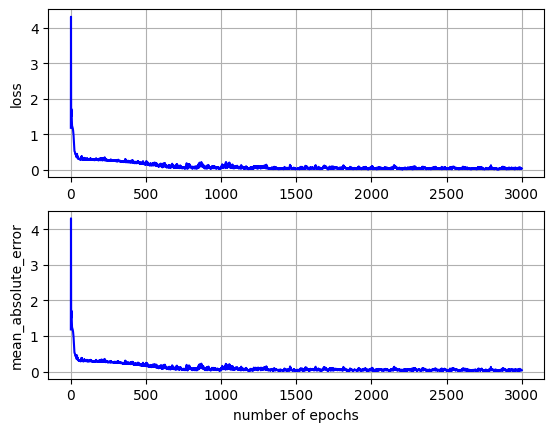

In [ ]:
# plotting the amount of loss and MAE based on the number of epochs
# loss part
plt.figure()
plt.subplot(2,1,1)
plt.plot(range(1,epochs+1), history.history['loss'], 'b')
plt.ylabel('loss')
plt.grid()
# MAE part
plt.subplot(2,1,2)
plt.plot(range(1,epochs+1), history.history['mean_absolute_error'], 'b')
plt.ylabel('mean_absolute_error')
plt.grid()
plt.xlabel('number of epochs')
plt.show()

### plotting the datapoints, actual and predicted ones in a same plot:

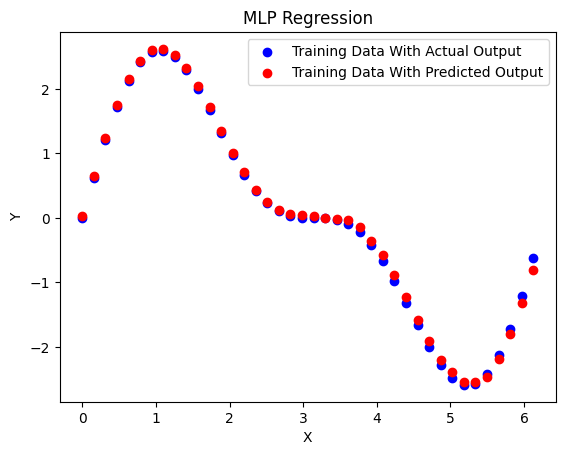

In [ ]:
# plotting the actual data and model predictions
plt.scatter(x, y, label='Training Data With Actual Output', color='blue')
plt.scatter(x, yp, label='Training Data With Predicted Output', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('MLP Regression')
plt.show()

### Plotting the datapoints for [0, 2pi], both actual and predicted, in one plot:
The actual datapoints are in the form of some large poins, and predicted output is in the form of a line. As you can see, the model is perfectly fitted to train range, [0, 2pi], but it shape a line for the rest of the range, [2pi, 4pi]. It is obvious that we have overfitting, but I believe that theMLP models can't implement circular inputs and functions like sin and cos. The "HW1_3_1' is the best model. I also test the model with dropout, "HW1_3_2", but I got kind of the exact answer.

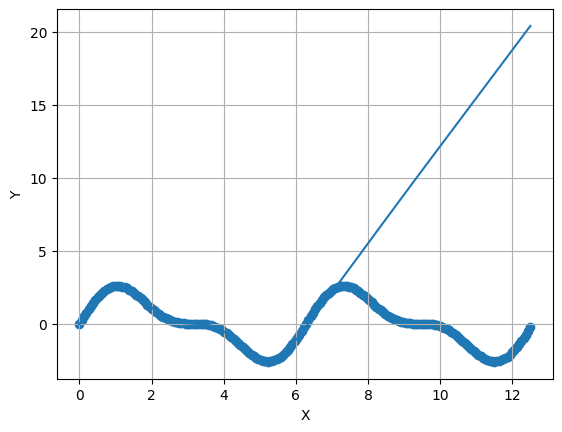

In [ ]:
# plotting the inputs and outputs of given range for smaller step pi/50
# input array
x2 = np.arange(0, 4*np.pi, np.pi/50)
# actual output
y2 = 2*np.sin(x2) + np.sin(2*x2)
# predicted output
yp2 = model.predict(x2, verbose = 0)
# plotting
plt.plot(x2, yp2)
plt.scatter(x2, y2)
plt.ylabel('Y')
plt.grid()
plt.xlabel('X')
plt.show()

In [ ]:
# saving the model
model.save('my_model_HW1_3_3.h5')

## model without dropout

In [ ]:
model = load_model('my_model_HW1_3_1.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1024      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 132609 (518.00 KB)
Trainable params: 132609 (518.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


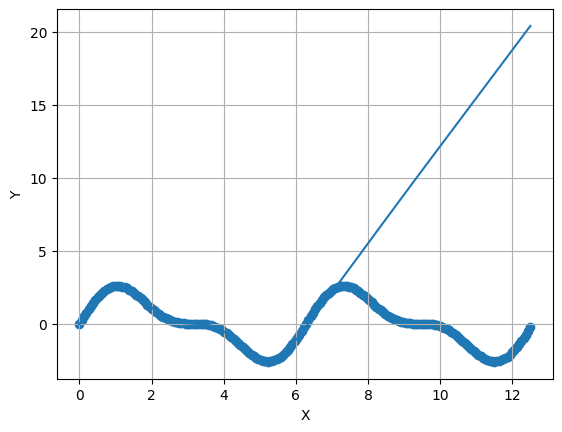

In [ ]:
# plotting the inputs and outputs of given range for smaller step pi/50
# input array
x2 = np.arange(0, 4*np.pi, np.pi/50)
# actual output
y2 = 2*np.sin(x2) + np.sin(2*x2)
# predicted output
yp2 = model.predict(x2, verbose = 0)
# plotting
plt.plot(x2, yp2)
plt.scatter(x2, y2)
plt.ylabel('Y')
plt.grid()
plt.xlabel('X')
plt.show()

## Model with dropout

In [ ]:
model = load_model('my_model_HW1_3_2.h5')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 512)               1024      
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_22 (Dense)            (None, 256)               131328    
                                                                 
 dense_23 (Dense)            (None, 1)                 257       
                                                                 
Total params: 132609 (518.00 KB)
Trainable params: 132609 (518.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


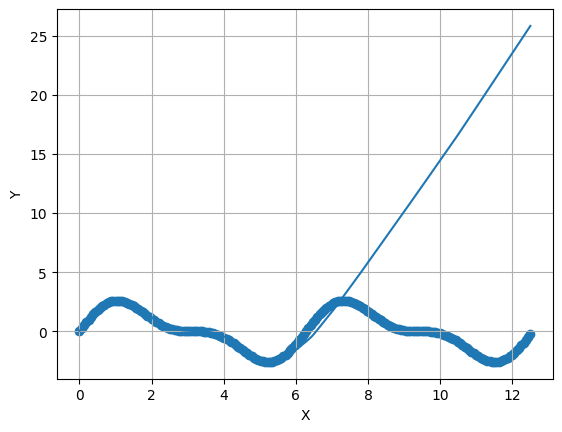

In [ ]:
# plotting the inputs and outputs of given range for smaller step pi/50
# input array
x2 = np.arange(0, 4*np.pi, np.pi/50)
# actual output
y2 = 2*np.sin(x2) + np.sin(2*x2)
# predicted output
yp2 = model.predict(x2, verbose = 0)
# plotting
plt.plot(x2, yp2)
plt.scatter(x2, y2)
plt.ylabel('Y')
plt.grid()
plt.xlabel('X')
plt.show()

سایت های استفاده شده:

https://medium.com/@nandiniverma78988/neural-network-regression-implementation-and-visualization-in-python-d5893713ed79
https://github.com/christianversloot/machine-learning-articles/blob/main/creating-an-mlp-for-regression-with-keras.md
https://numpy.org/doc/stable/
https://stackoverflow.com/questions/54183037/predicting-sine-with-ann-using-keras
